In [5]:
import keras
base_model = keras.applications.EfficientNetB0(include_top=False)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
from keras.utils import image_dataset_from_directory

In [12]:
train_ds, val_ds = image_dataset_from_directory(
    "C:/images", image_size=(224, 224),
    validation_split=0.2, subset="both",  seed=123 
)

Found 2148 files belonging to 2 classes.
Using 1719 files for training.
Using 429 files for validation.


In [13]:
base_model.trainable=False # 기존 학습된 커널의 가중치를 변경하지 않음

In [ ]:
inputs = keras.layers.Input(shape=(224, 224, 3))
x = base_model(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)

In [16]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

hist = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 683ms/step - accuracy: 0.8202 - loss: 0.3843 - val_accuracy: 0.9604 - val_loss: 0.1136
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 647ms/step - accuracy: 0.9643 - loss: 0.0934 - val_accuracy: 0.9814 - val_loss: 0.0723
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 651ms/step - accuracy: 0.9706 - loss: 0.0742 - val_accuracy: 0.9837 - val_loss: 0.0582
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 647ms/step - accuracy: 0.9833 - loss: 0.0481 - val_accuracy: 0.9930 - val_loss: 0.0485
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 644ms/step - accuracy: 0.9756 - loss: 0.0632 - val_accuracy: 0.9860 - val_loss: 0.0444
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 644ms/step - accuracy: 0.9880 - loss: 0.0371 - val_accuracy: 0.9883 - val_loss: 0.0411
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 638ms/step - accuracy: 0.9876 - loss: 0.0329 - val_accuracy: 0.9837 - val_loss: 0.0466
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 653ms/step - accuracy: 0.9925 - loss: 0.0320 - val_accu

ModuleNotFoundError: No module named 'matplotlib'

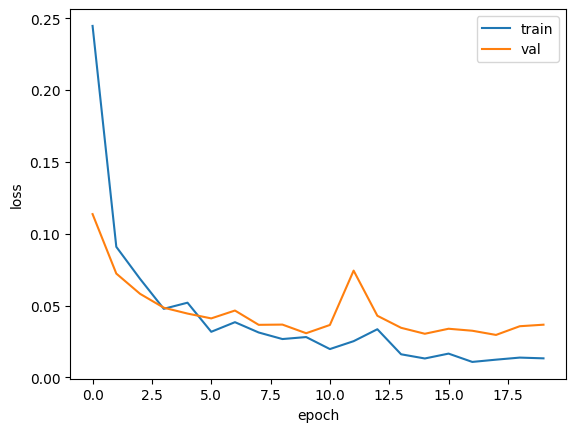

In [19]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


In [20]:
model2 = keras.models.load_model("best-model.keras")

In [21]:
model2.evaluate(val_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 483ms/step - accuracy: 0.9912 - loss: 0.0197


[0.029580986127257347, 0.9883449673652649]

In [23]:
import numpy as np
from PIL import Image

img = Image.open("C:/images/Siirt_Pistachio/siirt 230.jpg")
img = np.array(img.resize((224, 224)))
img.shape

(224, 224, 3)

In [24]:
img = img[np.newaxis, :]
img.shape

(1, 224, 224, 3)

In [25]:
model2.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.94371283]], dtype=float32)